## Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# importing the libraries
train = pd.read_csv('./predict-future-sales/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
test = pd.read_csv('./predict-future-sales/test.csv')
shops = pd.read_csv('./predict-future-sales/shops.csv')
items = pd.read_csv('./predict-future-sales/items.csv')
item_categories = pd.read_csv('./predict-future-sales/item_categories.csv')

# checking the shapes of these datasets
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)
print("Shape of shops:", shops.shape)
print("Shape of items:", items.shape)
print("Shape of item_categories:", item_categories.shape)

Shape of train: (2935849, 6)
Shape of test: (214200, 3)
Shape of shops: (60, 2)
Shape of items: (22170, 3)
Shape of item_categories: (84, 2)


In [28]:
# aggregate day sales of shop-items in the same year-month
monthly_sales_df = train.groupby([train['date'].apply(lambda x: x.strftime('%Y-%m')), 'item_id','shop_id']).sum(numeric_only=True).reset_index()
monthly_sales_df = monthly_sales_df.rename(columns = {'item_cnt_day': 'item_cnt_month'})

# get the pivot tables with year-month as columns
monthly_sales_df = monthly_sales_df.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_month', fill_value = 0).reset_index()

# keep the shop-items that also appear in November 2015
monthly_sales_df = pd.merge(test, monthly_sales_df, on = ['item_id', 'shop_id'], how = 'left')

# replace nan values with 0
monthly_sales_df.fillna(0, inplace = True)


monthly_sales_df

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# merge category id into training data
monthly_sales_df = pd.merge(monthly_sales_df, items,  how='left', left_on=['item_id'], right_on = ['item_id']).drop(['item_name'], axis=1)

# reorder the columns of the training data
column_list = monthly_sales_df.columns.tolist()
column_list.insert(3, column_list.pop())
monthly_sales_df = monthly_sales_df[column_list]

monthly_sales_df

,ID,shop_id,item_id,item_category_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,19,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,55,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,20,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,55,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,64,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,45,15757,55,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
year_month_list = monthly_sales_df.columns.values[4:]
num_year_month = len(year_month_list)

print(f"{num_year_month} Year months: \n{year_month_list}")

34 Year months: 
['2013-01' '2013-02' '2013-03' '2013-04' '2013-05' '2013-06' '2013-07'
 '2013-08' '2013-09' '2013-10' '2013-11' '2013-12' '2014-01' '2014-02'
 '2014-03' '2014-04' '2014-05' '2014-06' '2014-07' '2014-08' '2014-09'
 '2014-10' '2014-11' '2014-12' '2015-01' '2015-02' '2015-03' '2015-04'
 '2015-05' '2015-06' '2015-07' '2015-08' '2015-09' '2015-10']


In [31]:
X_train = []
y_train = []

X_train.extend(monthly_sales_df.loc[:, year_month_list[:-5]].values)
X_train.extend(monthly_sales_df.loc[:, year_month_list[1:-4]].values)
X_train.extend(monthly_sales_df.loc[:, year_month_list[2:-3]].values)
X_train.extend(monthly_sales_df.loc[:, year_month_list[3:-2]].values)

y_train.extend(monthly_sales_df.loc[:, year_month_list[-5]].values)
y_train.extend(monthly_sales_df.loc[:, year_month_list[-4]].values)
y_train.extend(monthly_sales_df.loc[:, year_month_list[-3]].values)
y_train.extend(monthly_sales_df.loc[:, year_month_list[-2]].values)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = monthly_sales_df[year_month_list[4:-1]].values
y_test = monthly_sales_df[year_month_list[-1]].values

print("Shape of x_train :", X_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (856800, 29)
Shape of x_test : (214200, 29)
Shape of y_train : (856800,)
Shape of y_test : (214200,)


In [32]:
from sklearn.model_selection import train_test_split

X, X_valid, y, y_valid = train_test_split(X_train[:,5:], y_train, test_size = 0.2, random_state = 0)

# checking the shapes
print("Shape of x_train :", X.shape)
print("Shape of x_valid :", X_valid.shape)
print("Shape of y_train :", y.shape)
print("Shape of y_valid :", y_valid.shape)

Shape of x_train : (685440, 24)
Shape of x_valid : (171360, 24)
Shape of y_train : (685440,)
Shape of y_valid : (171360,)


## Find the best hyper parameters of the model using GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
import lightgbm
lgb = LGBMRegressor()

parameters = {
    'boosting_type': ['dart'],
    'learning_rate': [0.05], #so called `eta` value
    'max_depth': [2],
    'num_leaves': [4],
    'n_estimators': [500],
    'min_data_in_leaf': [2],
    'reg_alpha': [0.05],
    'reg_lambda': [0.01],
    
}

lgb_grid = GridSearchCV(lgb,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        scoring = "neg_mean_squared_error",
                        verbose=1)

lgb_grid.fit(X, y)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/root/anaconda3/envs/gb_test/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/gb_test/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/gb_test/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2


GridSearchCV(cv=2, estimator=LGBMRegressor(), n_jobs=5,
             param_grid={'boosting_type': ['dart'], 'learning_rate': [0.05],
                         'max_depth': [2], 'min_data_in_leaf': [2],
                         'n_estimators': [500], 'num_leaves': [4],
                         'reg_alpha': [0.05], 'reg_lambda': [0.01]},
             scoring='neg_mean_squared_error', verbose=1)

In [12]:
from sklearn.model_selection import cross_val_score

print(f"Best cross validated score: {lgb_grid.best_score_}")
print(f"Best cross validated parameters: \n{lgb_grid.best_params_}")

NameError: name 'lgb_grid' is not defined

## Use the best parameters obtained from GridSearchCV to build the model

In [27]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from lightgbm import LGBMRegressor


# best_param = lgb_grid.best_params_
# lgb_reg = LGBMRegressor(**best_param)

lgb_reg = LGBMRegressor(boosting_type='dart', learning_rate=0.05, max_depth=2,
              min_data_in_leaf=2, n_estimators=500, num_leaves=4,
              reg_alpha=0.05, reg_lambda=0.01)

lgb_reg.fit(X, y, eval_metric = "l1")

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2


LGBMRegressor(boosting_type='dart', learning_rate=0.05, max_depth=2,
              min_data_in_leaf=2, n_estimators=500, num_leaves=4,
              reg_alpha=0.05, reg_lambda=0.01)

In [28]:
scores = cross_val_score(lgb_reg, X_valid, y_valid, scoring='neg_mean_absolute_error')

print(f"Mean scores: {np.mean(scores)}")
print(scores)

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
Mean scores: -0.31273060288018883
[-0.31049165 -0.32014068 -0.31057785 -0.31565676 -0.30678607]


### Evaluate the model by plotting graphs

In [2]:
import lightgbm
lgb_reg = lightgbm.Booster(model_file="../model/model.txt")

In [64]:
y_hat = lgb_reg.predict(X_test[:,1:])
y_act = y_test

(0.0, 400.0)

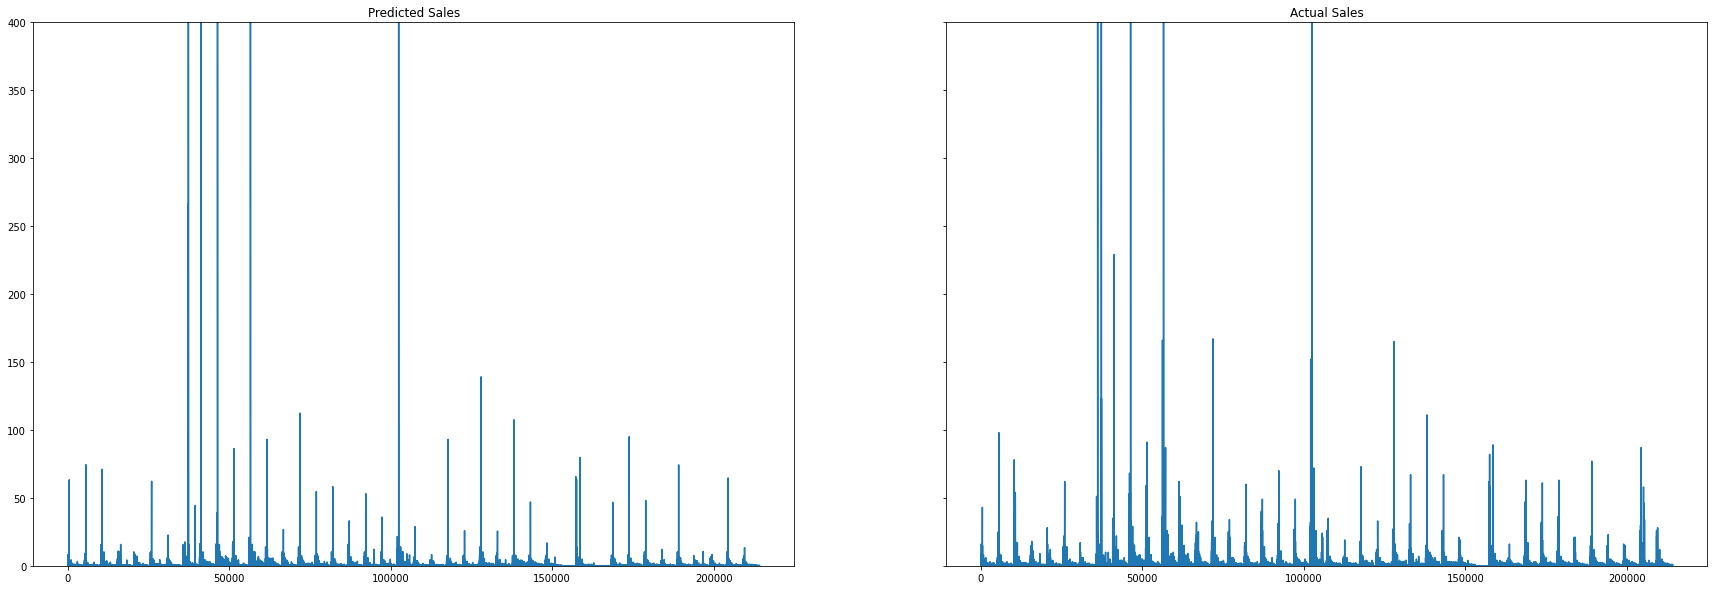

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10), sharey=True)
ax1.plot(y_hat)
ax1.title.set_text('Predicted Sales')

ax2.plot(y_act)
ax2.title.set_text('Actual Sales')
ax2.set_ylim((0, 400))


### Evaluate the model by comparing top 10 shop items

In [22]:
sorted(np.argpartition(y_hat, -10)[-10:])

[37296, 37341, 41260, 46360, 56560, 71860, 102460, 127960, 138160, 189160]

In [23]:
sorted(np.argpartition(y_act, -10)[-10:])

[36160, 37296, 41260, 46360, 56233, 56560, 71860, 102133, 102460, 127960]

(27383.0, 206107.0)

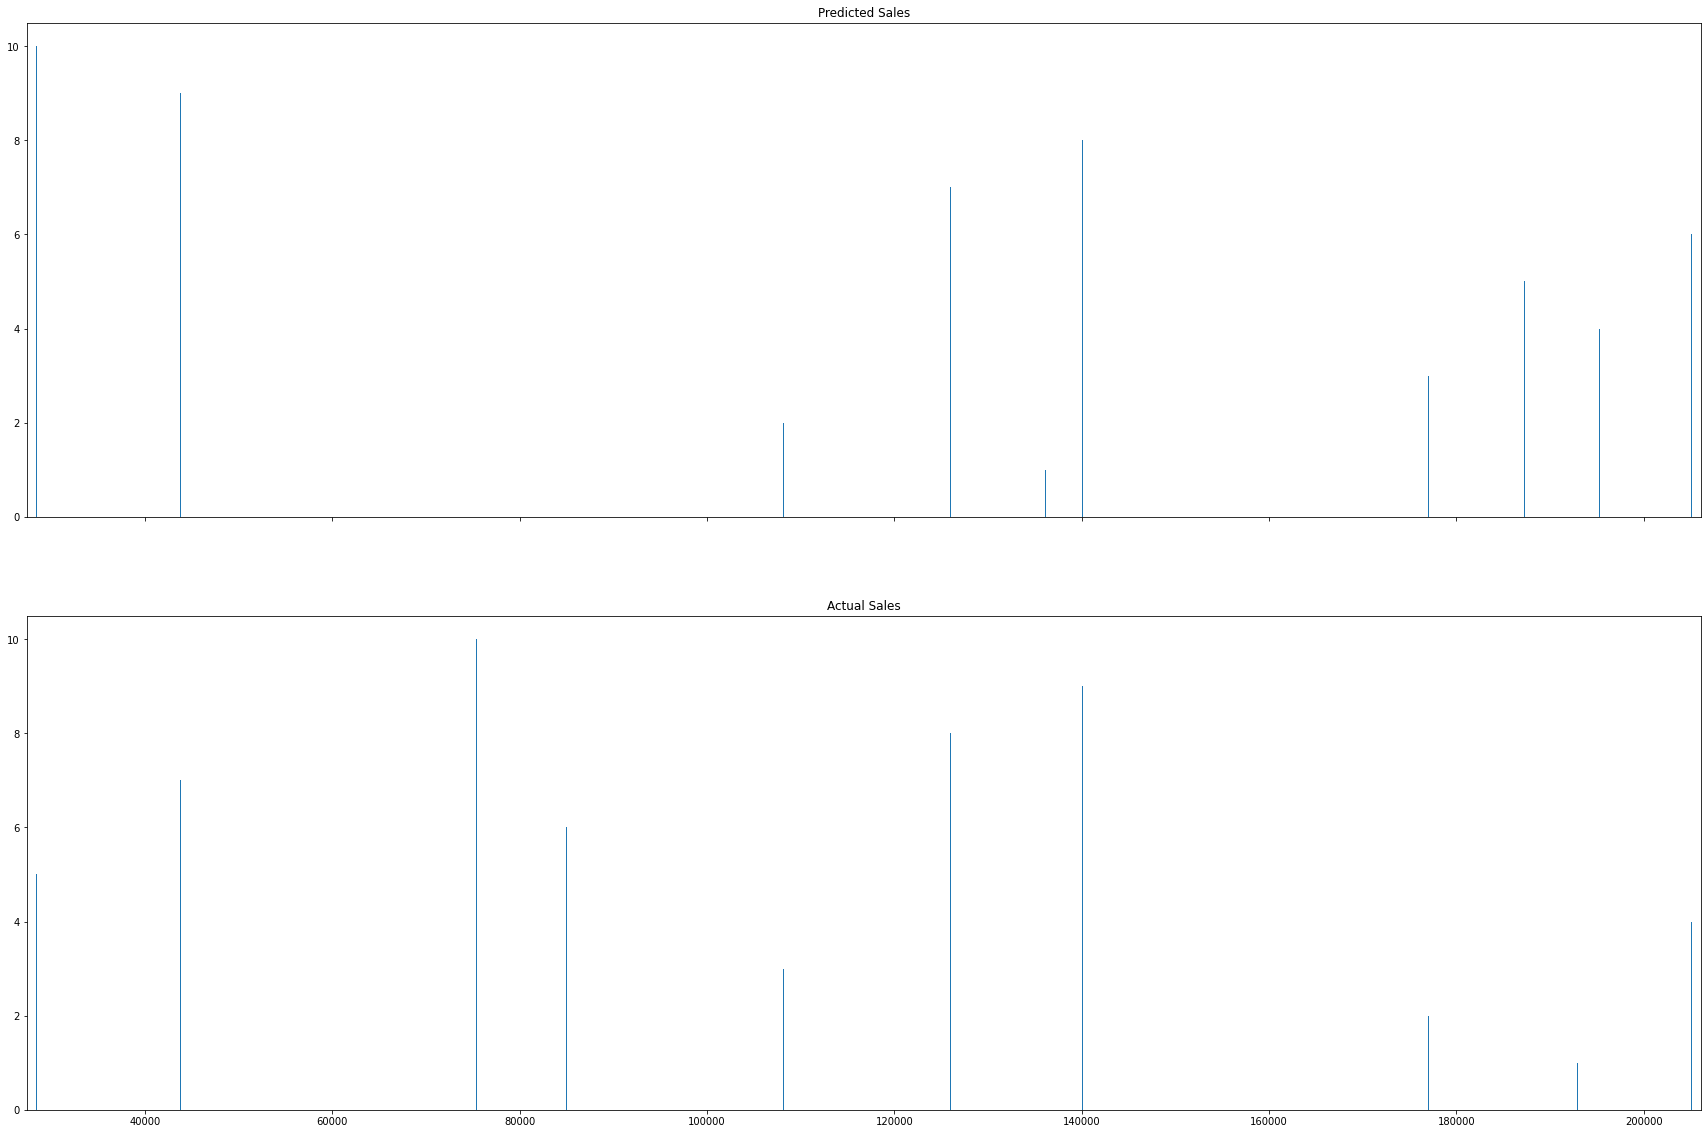

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is

In [63]:
predicted_top_10 = np.argpartition(y_hat, -10)[-10:]
actual_top_10 = np.argpartition(y_act, -10)[-10:]

fig, (ax1, ax2) = plt.subplots(2, figsize=(30, 20), sharex=True)
ax1.bar(predicted_top_10, range(1, 11), width = 100)
ax1.title.set_text('Predicted Sales')

ax2.bar(actual_top_10, range(1, 11), width = 100)
ax2.title.set_text('Actual Sales')

ax1.set_xlim([np.min([predicted_top_10, actual_top_10]) - 1000, np.max([predicted_top_10, actual_top_10]) + 1000])
